# Introduction to text analysis VI #

## Topic detection ##

One of the most important tasks in text analysis is the topic detection, i.e. assigning one or more topics to a document or to a set of documents.

To guess the most important features of a document that eventually will be the "topics" we need to start from the frequency and importance of the words in a document. 

In [2]:
import nltk
import codecs

text = codecs.open("inaug_speeches.csv","r","iso-8859-2").read()

tokens = nltk.word_tokenize(text)

In [ ]:
## list comprehension

In [6]:
words = [w.lower() for w in tokens]
#words

In [9]:
len(words)

152066

In [7]:
all_words = nltk.FreqDist(w.lower() for w in tokens)

In [10]:
type(all_words)

nltk.probability.FreqDist

In [13]:
a = "string"

dir(a)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

In [11]:
dir(all_words)

['B',
 'N',
 'Nr',
 '_N',
 '__add__',
 '__and__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__init__',
 '__ior__',
 '__isub__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__missing__',
 '__module__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_cumulative_frequencies',
 '_keep_positive',
 'clear',
 'copy',
 'elements',
 'freq',
 'fromkeys',
 'get',
 'hapaxes',
 'items',
 'keys',
 'max',
 'most_common',
 'pformat',
 'plot',
 'pop',
 'popitem',
 'pprint',
 'r_Nr',
 'setdefault',
 'subtract',
 'tabulate',
 'unicode_repr',
 'update',
 'values']

In [14]:
all_words.most_common()

[('the', 10102),
 (',', 7408),
 ('of', 7112),
 ('and', 5317),
 ('.', 4859),
 ('to', 4531),
 ('in', 2788),
 ('a', 2252),
 ('our', 2185),
 ('that', 1794),
 ('we', 1747),
 ('be', 1485),
 ('is', 1466),
 ('it', 1388),
 ('for', 1200),
 ('by', 1085),
 ('not', 1014),
 ('have', 1012),
 ('which', 1006),
 ('with', 957),
 ('as', 947),
 ('will', 913),
 ('i', 839),
 ('this', 835),
 ("''", 824),
 ('all', 818),
 ('are', 813),
 ('their', 756),
 ('but', 654),
 ('has', 623),
 ('people', 580),
 ('from', 573),
 ('its', 572),
 ('government', 572),
 (';', 571),
 ('or', 559),
 ('on', 538),
 ('can', 528),
 ('>', 522),
 ('<', 521),
 ('my', 495),
 ('been', 489),
 ('us', 480),
 ('no', 465),
 ('they', 456),
 ('u+0097', 432),
 ('an', 390),
 ('so', 387),
 ('upon', 373),
 ('who', 370),
 ('must', 366),
 ('at', 349),
 ('great', 340),
 ('may', 338),
 ('states', 335),
 ('world', 335),
 ('should', 327),
 ('those', 327),
 ('them', 326),
 ('country', 316),
 ('nation', 316),
 ('shall', 314),
 ('more', 313),
 ('every', 298),


In [8]:
for a,f in all_words.items():
    print(a,f)
    break

flag 14


** sorting the resulting dictionary by value **

In [4]:
import operator

sorted_frequencies = sorted(all_words.items(), key=operator.itemgetter(1), reverse = True)

In [5]:
for s in sorted_frequencies[0:10]:
    print(s)

('the', 10102)
(',', 7408)
('of', 7112)
('and', 5317)
('.', 4859)
('to', 4531)
('in', 2788)
('a', 2252)
('our', 2185)
('that', 1794)


In [6]:
sorted_frequencies[-10:-1]

[('terrifying', 1),
 ('waves', 1),
 ('bleak', 1),
 ('utterance', 1),
 ('naturalizing', 1),
 ('payable', 1),
 ('neighborhoods', 1),
 ('abound', 1),
 ('entertaining', 1)]

** sorting the dictionary using pandas **

In [15]:
import pandas as pd

In [16]:
dfreq = pd.DataFrame.from_dict(all_words,orient="index")

In [17]:
ndf = pd.DataFrame({'word' : dfreq.index, 'freq' : [d[0] for d in dfreq.values]})

In [18]:
ndf.head()

,freq,word
0,14,flag
1,2,purchased
2,1,humanize
3,3,considering
4,1,misled


In [19]:
ndf.sort_values(by='freq',ascending=False).head(30)

,freq,word
3763,10102,the
7826,7408,","
3806,7112,of
167,5317,and
6011,4859,.
8133,4531,to
2184,2788,in
2986,2252,a
4659,2185,our
5620,1794,that


In [16]:
ndf[ndf['freq'] == 27]

,freq,word
324,27,capital
398,27,came
1154,27,serve
1494,27,departments
2103,27,practical
2160,27,private
2390,27,vast
2935,27,peaceful
2954,27,constant
3049,27,sacred


** sorting and plotting : rediscovering the Zipf law**

In [20]:
sorted_freqs = ndf.sort_values(by='freq',ascending=False)

In [21]:
vals = list(sorted_freqs['freq'])

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


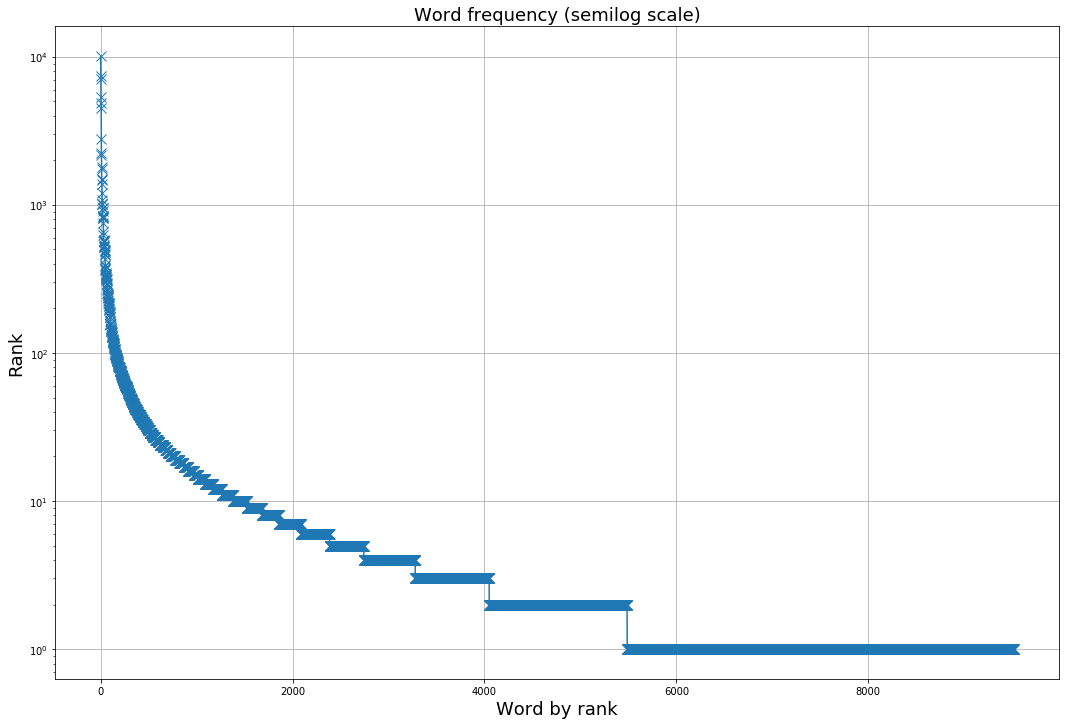

In [22]:
%pylab inline

fig = plt.figure(figsize=(18,12))
ax = plt.gca()
ax.plot(np.arange(len(vals)), vals, marker = "x", markersize=10)
ax.set_yscale('log')
ax.set_xlabel('Word by rank',fontsize=18)
ax.set_ylabel('Rank',fontsize=18)
ax.set_title('Word frequency (semilog scale)',fontsize=18)
plt.grid()

Populating the interactive namespace from numpy and matplotlib


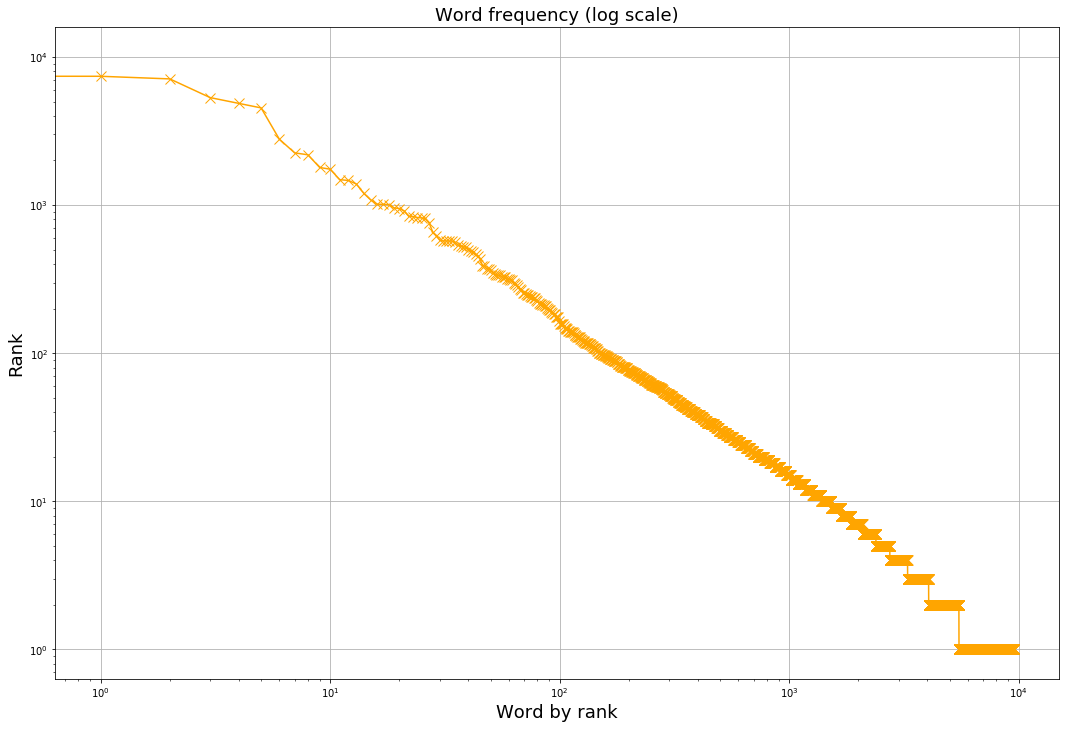

In [57]:
%pylab inline

fig = plt.figure(figsize=(18,12))
ax = plt.gca()
ax.plot(np.arange(len(vals)), vals, marker = "x", markersize=10,color="orange")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Word by rank',fontsize=18)
ax.set_ylabel('Rank',fontsize=18)
ax.set_title('Word frequency (log scale)',fontsize=18)
plt.grid()

## tag cloud bonus ##

In [30]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import csv
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [31]:
from wordcloud import WordCloud, STOPWORDS


In [49]:
csvin = "inaug_speeches.csv"

documents = []
presidents = {}
with codecs.open(csvin,"r","iso-8859-2") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        text = row['text']
        president = row['Name']
        text = text.lower()
        if(president in presidents):
            presidents[president] += text
        else:
            presidents[president] = text
        


In [50]:
washington_speech = presidents['George Washington']

In [60]:

w_mask = np.array(Image.open("wash.png"))

stopwords = set(STOPWORDS)
stopwords.add('will')


wc = WordCloud(background_color="white", max_words=2000, mask=w_mask, stopwords=stopwords)
# generate word cloud
wc.generate(washington_speech)

# store to file
wc.to_file("washington_wcloud.png")


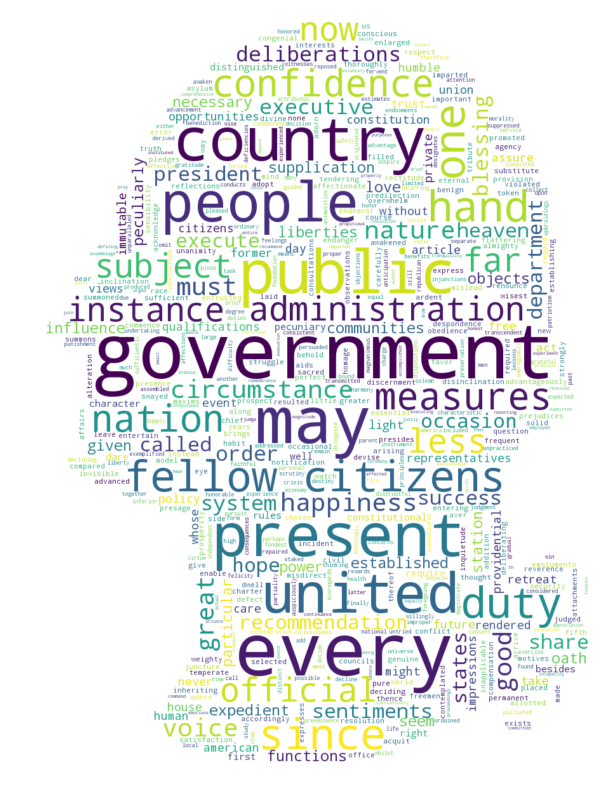

In [59]:
# show
fig = plt.figure(figsize=(20,14))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.axis("off")
plt.show()

In [54]:
trump_speech = presidents['Donald J. Trump']

In [64]:

t_mask = np.array(Image.open("Trump.png"))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="black", max_words=2000, mask=t_mask, stopwords=stopwords)
# generate word cloud
wc.generate(trump_speech)

# store to file
wc.to_file("trump_wcloud.png")

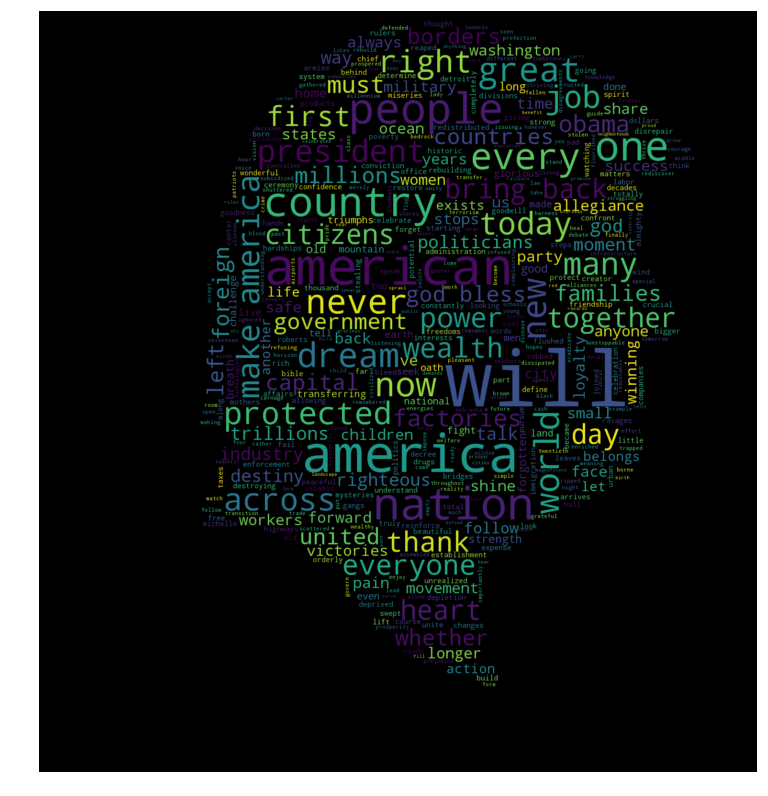

In [65]:
# show
fig = plt.figure(figsize=(20,14))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.axis("off")
plt.show()